# Weather Trend Forecasting

In [15]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning & Preprocessing

In [16]:
# Load dataset
df_weather = pd.read_csv('../data/GlobalWeatherRepository.csv')

In [17]:
# Show information about the dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98799 entries, 0 to 98798
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       98799 non-null  object 
 1   location_name                 98799 non-null  object 
 2   latitude                      98799 non-null  float64
 3   longitude                     98799 non-null  float64
 4   timezone                      98799 non-null  object 
 5   last_updated_epoch            98799 non-null  int64  
 6   last_updated                  98799 non-null  object 
 7   temperature_celsius           98799 non-null  float64
 8   temperature_fahrenheit        98799 non-null  float64
 9   condition_text                98799 non-null  object 
 10  wind_mph                      98799 non-null  float64
 11  wind_kph                      98799 non-null  float64
 12  wind_degree                   98799 non-null  int64  
 13  w

In [18]:
# Check for missing values
df_weather.isnull().sum() # ok there is no missing values

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [19]:
# Check for duplicates
df_weather.duplicated().sum() # ok there is no duplicates

np.int64(0)

In [20]:
# display numerical columns statistics
df_weather.describe()


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,98799.000000,98799.000000,9.879900e+04,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,...,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000,98799.000000
mean,19.149466,22.103412,1.737845e+09,22.758717,72.967426,8.228550,13.245873,170.830454,1013.985101,29.942319,...,18.523450,514.352606,62.526413,15.770612,11.205621,26.021920,53.410440,1.755949,2.750210,50.062845
std,24.455369,65.817395,1.269618e+07,8.886017,15.994642,7.847469,12.626867,102.699597,11.332383,0.334593,...,14.630947,840.450074,32.189633,25.962913,40.548751,40.627678,163.341362,0.979493,2.560628,35.036866
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.726916e+09,18.100000,64.600000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.500000,236.800000,42.000000,1.300000,0.895000,7.400000,10.730000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.737886e+09,24.900000,76.800000,6.900000,11.200000,165.000000,1013.000000,29.920000,...,15.800000,325.600000,59.400000,4.995000,2.405000,14.985000,22.015000,1.000000,2.000000,51.000000
75%,40.400000,50.580000,1.748855e+09,28.300000,82.900000,11.200000,18.000000,256.000000,1018.000000,30.050000,...,24.400000,505.050000,79.000000,17.945000,9.065000,29.785000,45.695000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.759731e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [21]:
# display categrocal columns statistics
df_weather.describe(include=['object'])

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,98799,98799,98799,98799,98799,98799,98799,98799,98799,98799,98799
unique,211,254,197,16759,47,16,458,544,1441,1441,8
top,Bulgaria,Kabul,Asia/Bangkok,2025-04-15 11:15,Partly cloudy,E,05:56 AM,06:02 PM,No moonrise,No moonset,Waxing Gibbous
freq,1090,508,1932,44,30727,9364,1115,948,3302,3302,22537


In [22]:
# Convert 'last_updated' to datetime
df_weather['last_updated'] = pd.to_datetime(df_weather['last_updated'])

# Calculate basic temperature statistics
temperature_max = df_weather['temperature_celsius'].max()
temperature_min = df_weather['temperature_celsius'].min()
temperature_mean = df_weather['temperature_celsius'].mean()

# Get the most recent update timestamp
last_updated = df_weather['last_updated'].max().strftime('%Y-%m-%d %H:%M:%S')

# Calculate the average temperature for each country per year
average_temp_by_country_year = (
    df_weather
    .groupby(['country', df_weather['last_updated'].dt.year])['temperature_celsius']
    .mean()
    .reset_index()
    .rename(columns={'last_updated': 'year', 'temperature_celsius': 'average_temperature_celsius'})
)

print("Maximum Temperature (°C):", temperature_max)
print("Minimum Temperature (°C):", temperature_min)
print("Mean Temperature (°C):", temperature_mean)
print("Last Updated:", last_updated)
print("\nAverage Temperature by Country and Year:\n")
print(average_temp_by_country_year)


Maximum Temperature (°C): 49.2
Minimum Temperature (°C): -24.9
Mean Temperature (°C): 22.75871719349386
Last Updated: 2025-10-06 19:15:00

Average Temperature by Country and Year:

         country  year  average_temperature_celsius
0    Afghanistan  2024                    22.696943
1    Afghanistan  2025                    21.167742
2        Albania  2024                    25.022271
3        Albania  2025                    21.374194
4        Algeria  2024                    25.154386
..           ...   ...                          ...
391    Гватемала  2024                    15.900000
392       Польша  2024                    24.200000
393       Турция  2024                    34.000000
394     كولومبيا  2024                    23.100000
395           火鸡  2024                    29.700000

[396 rows x 3 columns]


In [23]:
# display the numerical columns and categorical columns
numerical_cols = df_weather.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_weather.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')
Categorical Columns: Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase'],
      dtype='object')


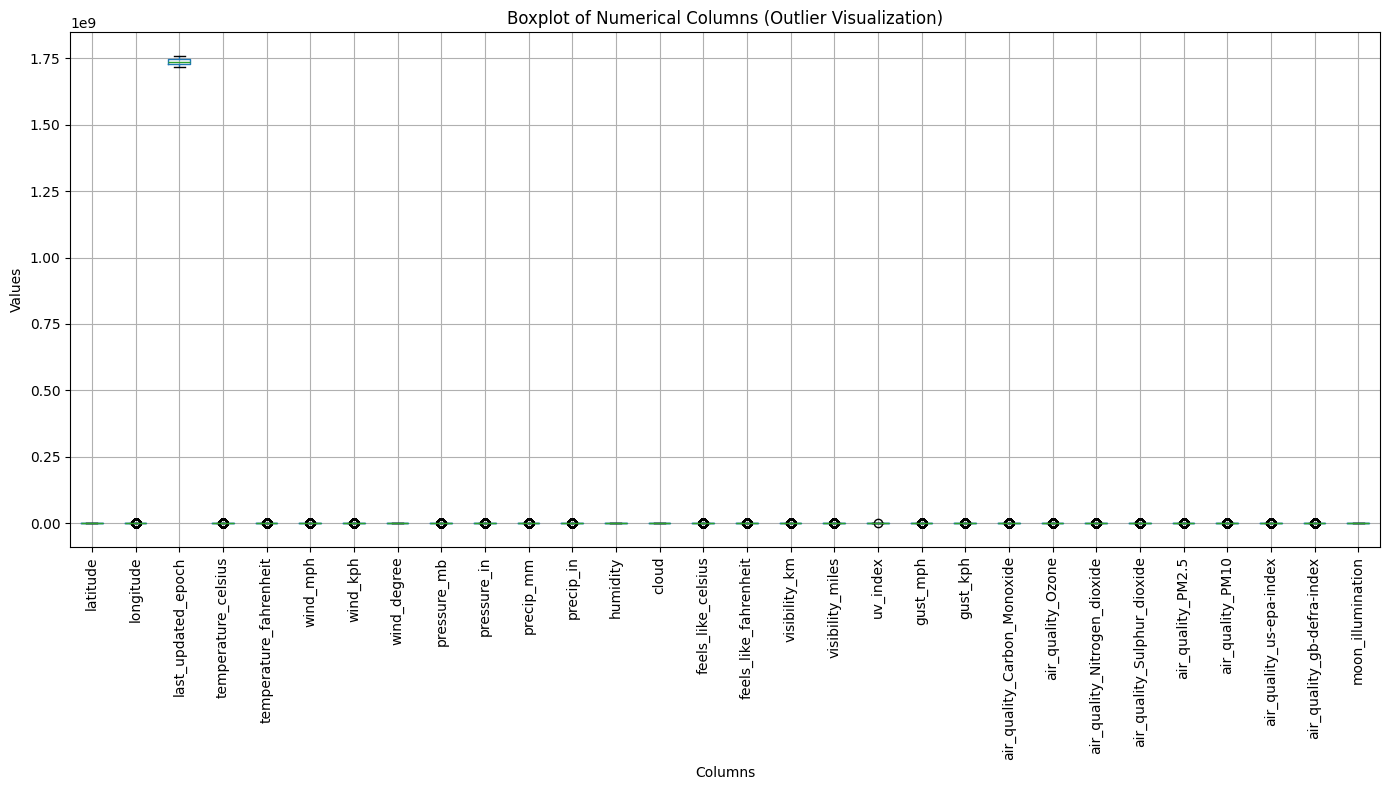

In [24]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(14, 8))
df_weather[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Columns (Outlier Visualization)")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

Why It Looks Compressed

One column — last_updated_epoch — has very large values (around 1.7×10⁹), while other columns (like temperature, humidity, etc.) are much smaller (e.g., 20–100).
That’s why the rest look “flat” — the scale is dominated by this large numeric column.

## Detect Outliers


--- Outliers in 'latitude' ---
No outliers detected.

--- Outliers in 'longitude' ---
     longitude
8       149.22
58      178.42
85      139.69
89      169.53
107     171.38
110     -99.13
111     158.15
123     174.78
135     147.19
148    -171.73

--- Outliers in 'last_updated_epoch' ---
No outliers detected.

--- Outliers in 'temperature_celsius' ---
      temperature_celsius
35                    1.0
230                   2.0
942                  44.1
1005                 44.0
1200                 45.0
1395                 44.0
2565                 44.0
2816                 44.8
3000                 45.0
3010                 45.6

--- Outliers in 'temperature_fahrenheit' ---
      temperature_fahrenheit
811                     37.4
852                     39.2
2892                   110.7
3281                   110.3
3671                   110.4
3985                   110.7
3990                    38.2
4061                   110.5
4256                   110.3
4644               

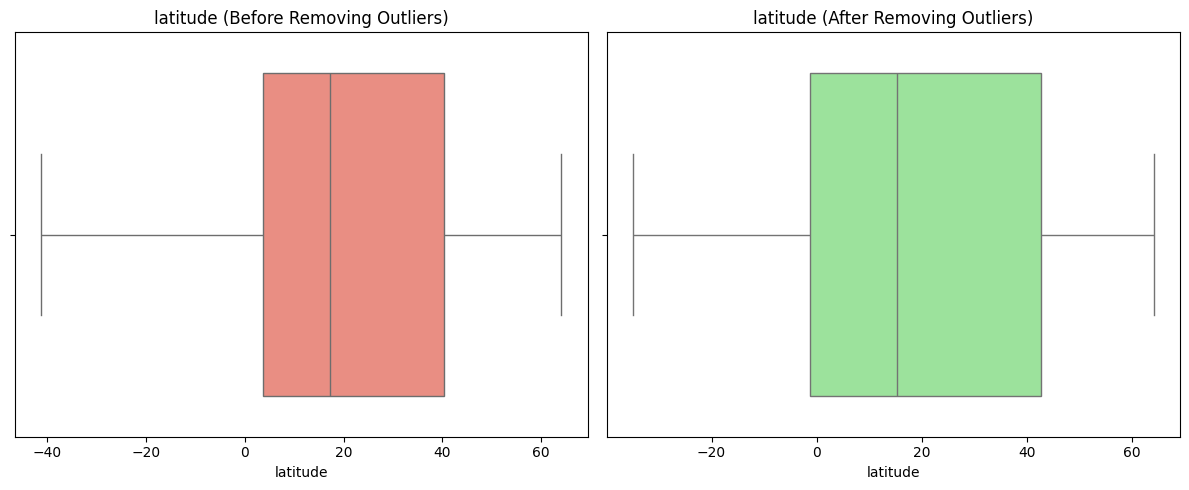

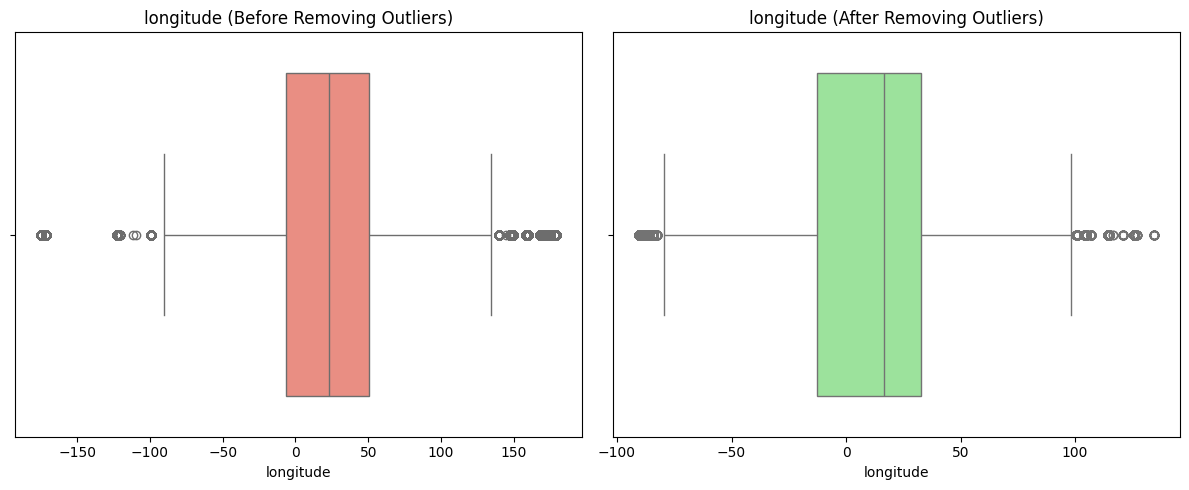

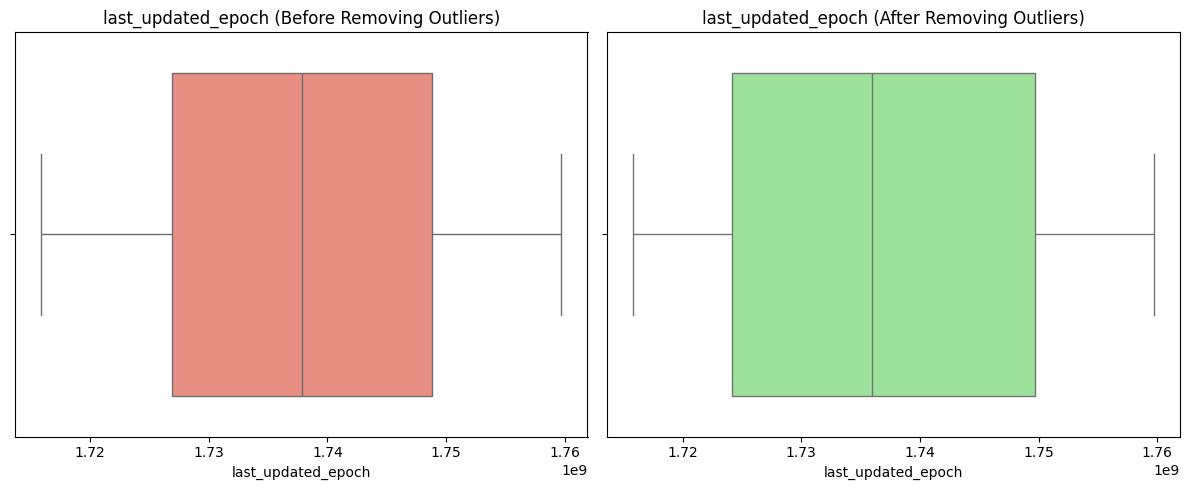

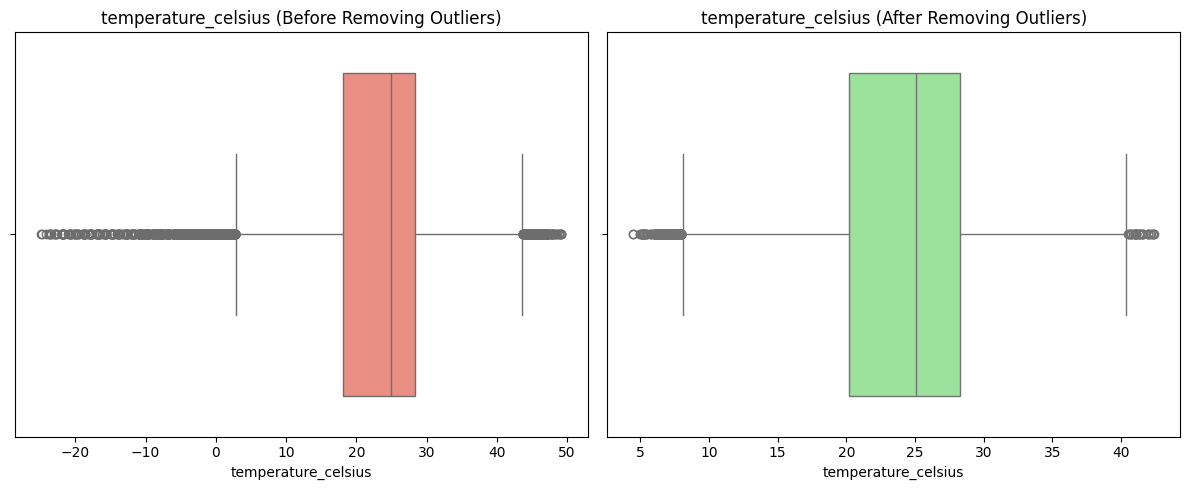

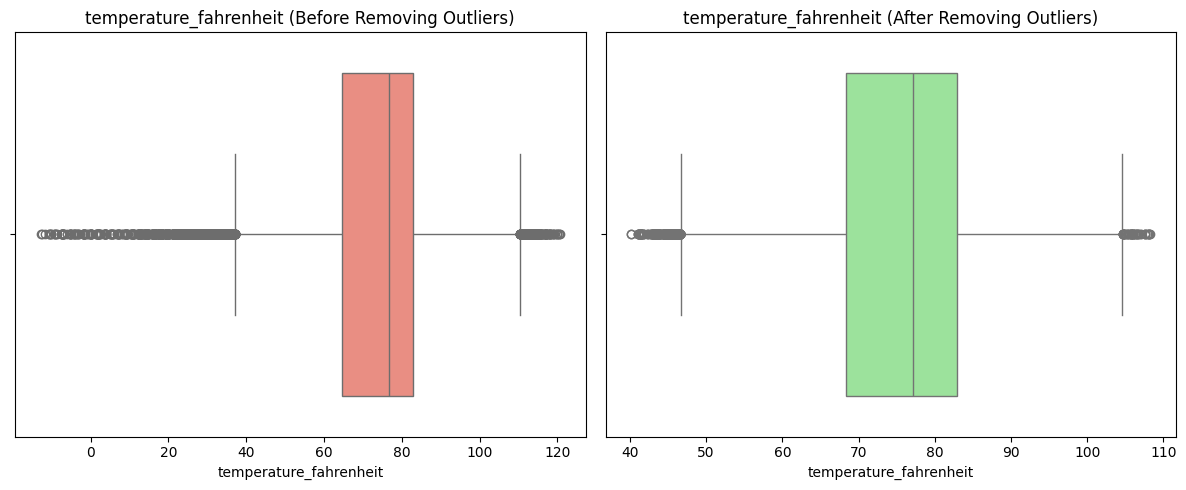

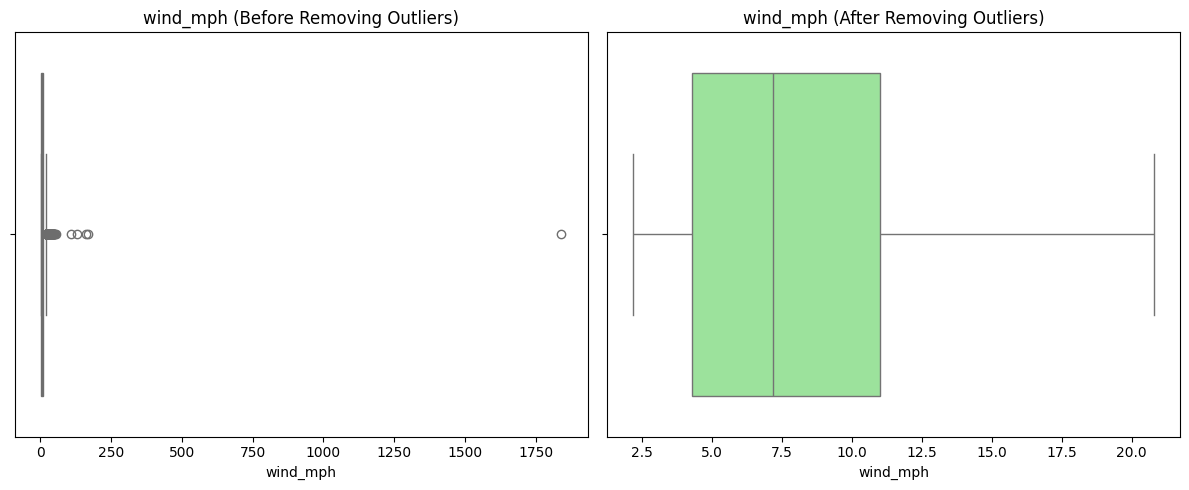

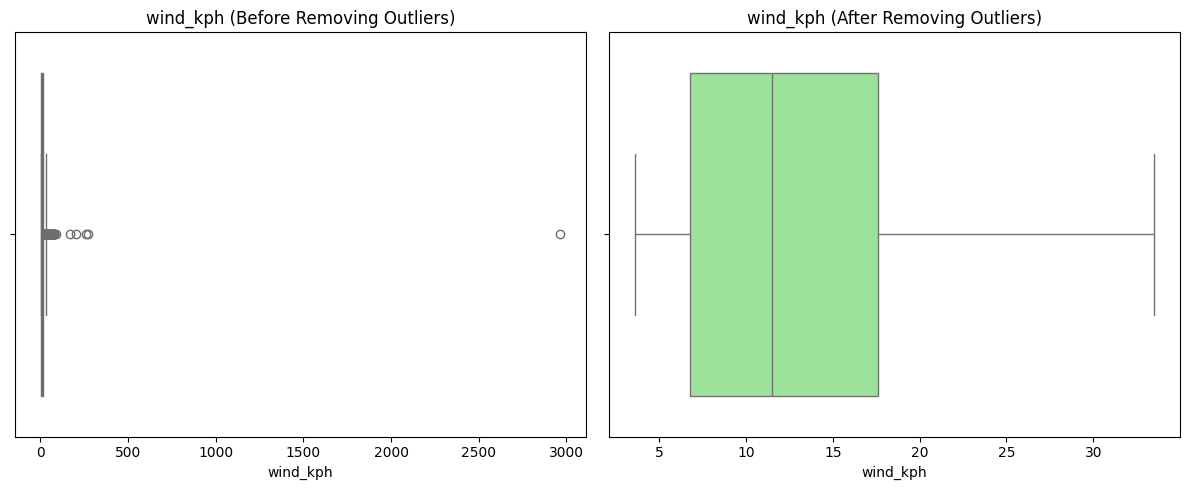

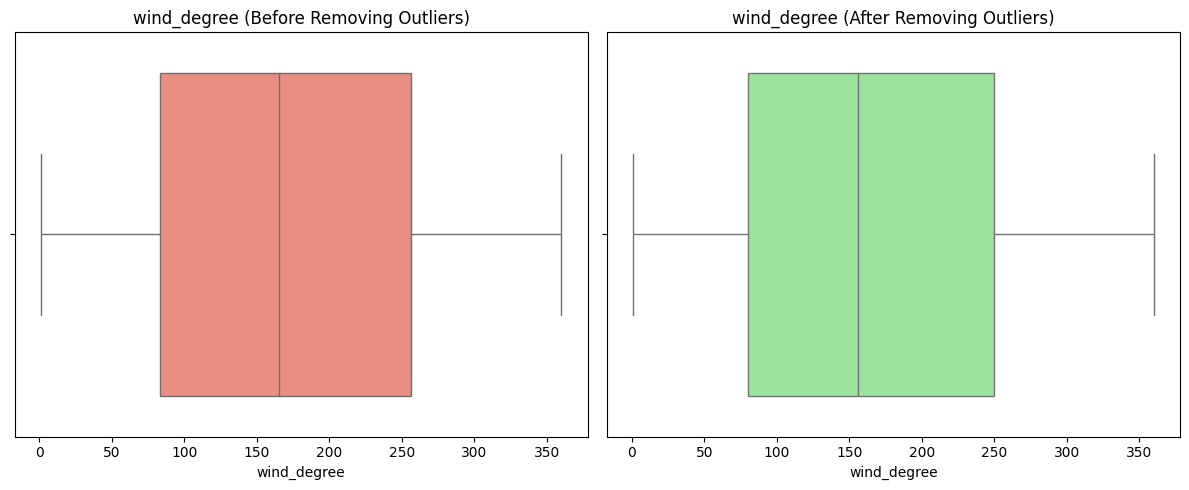

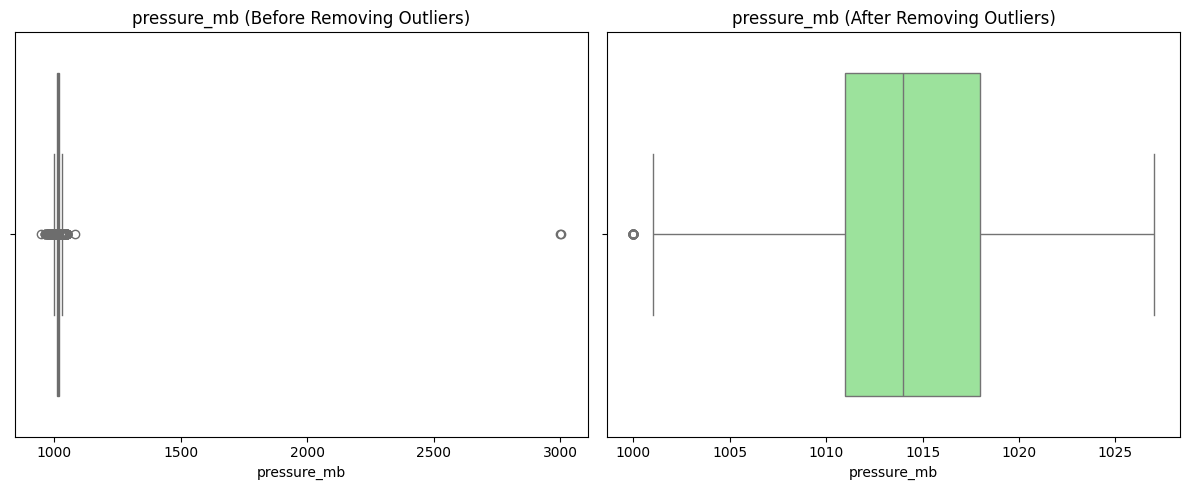

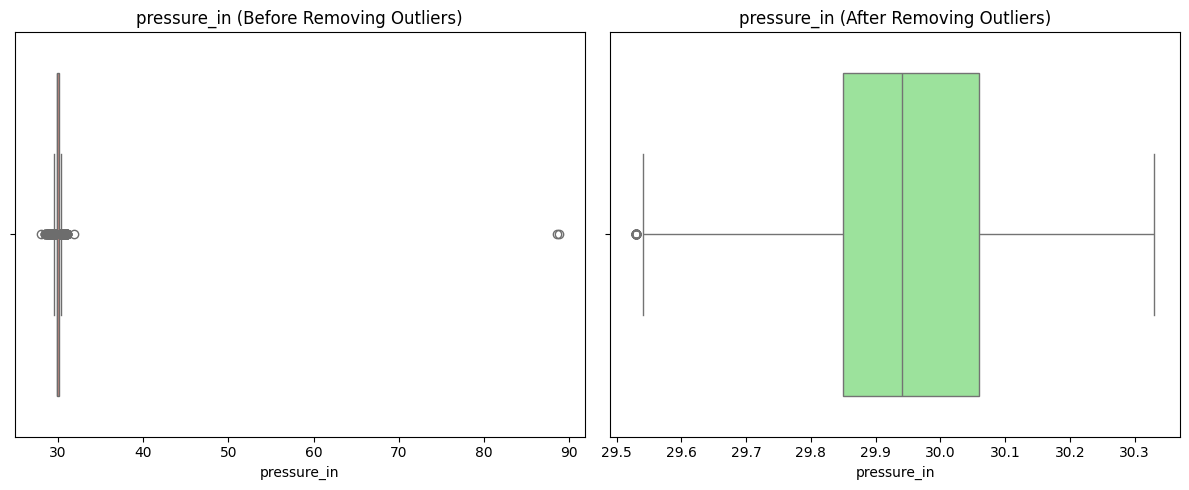

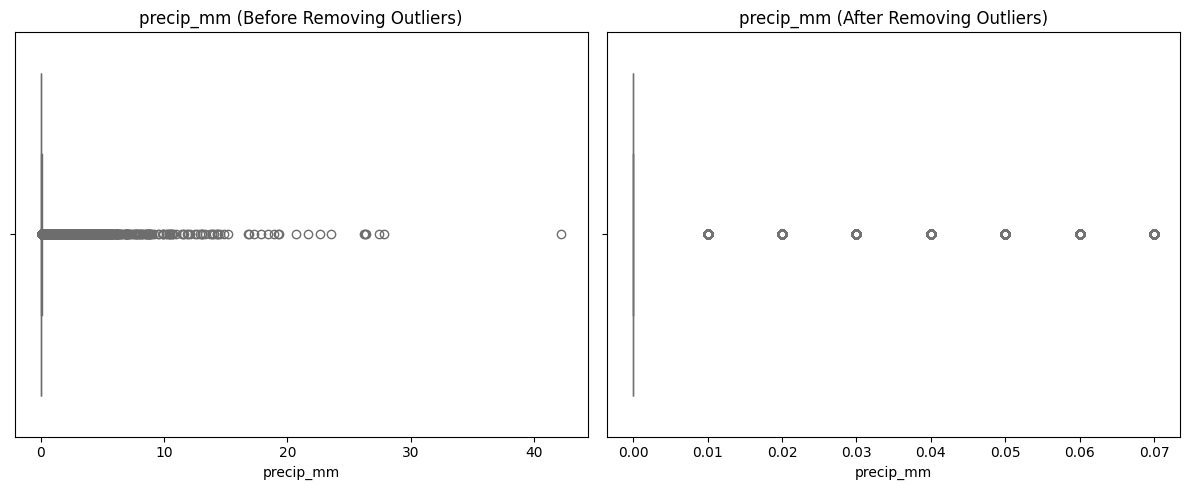

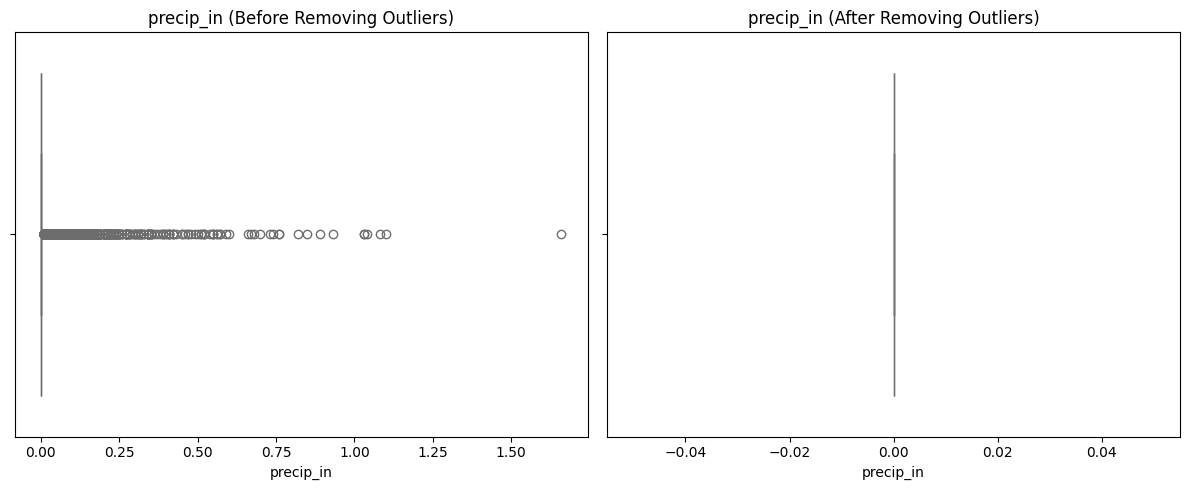

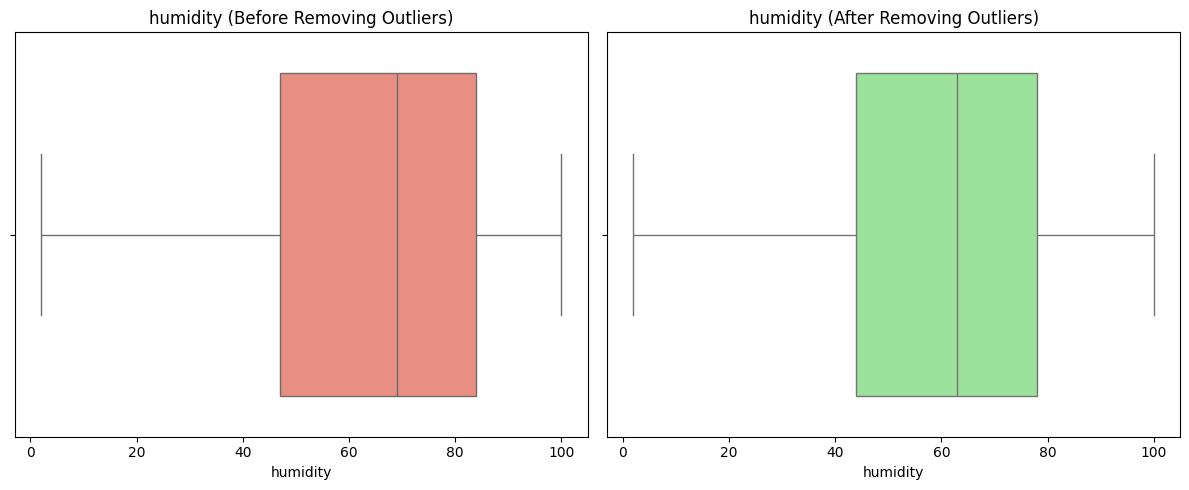

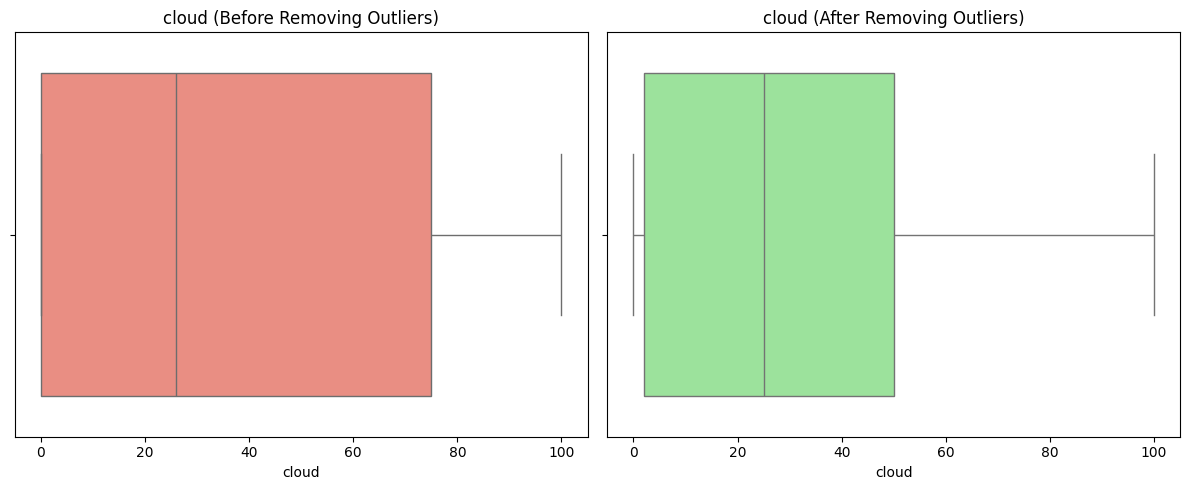

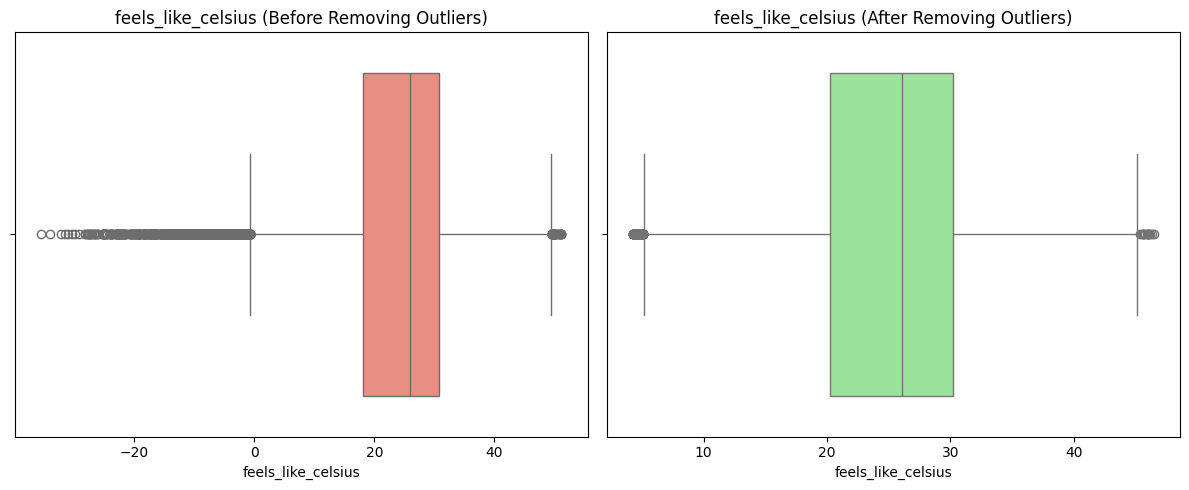

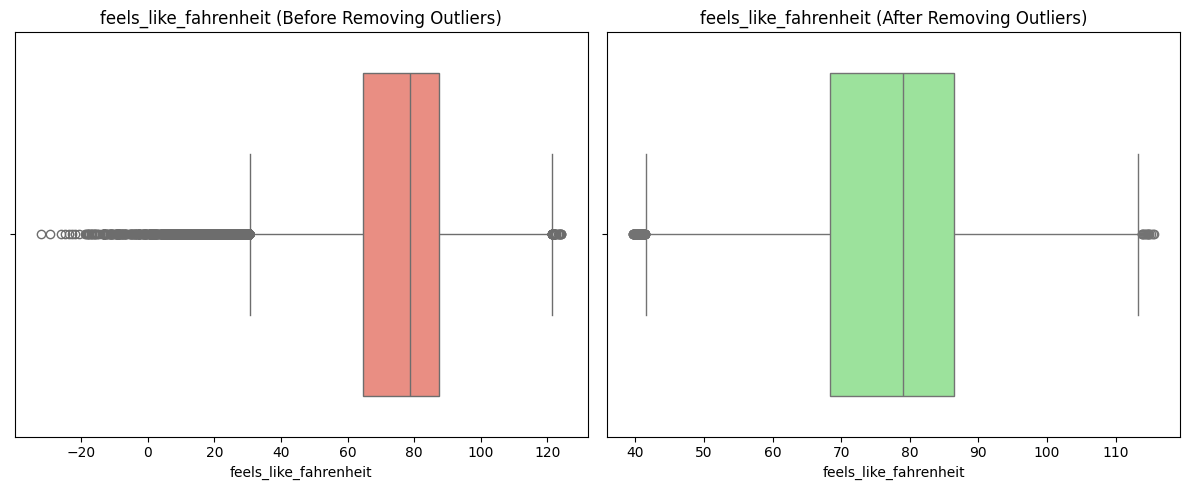

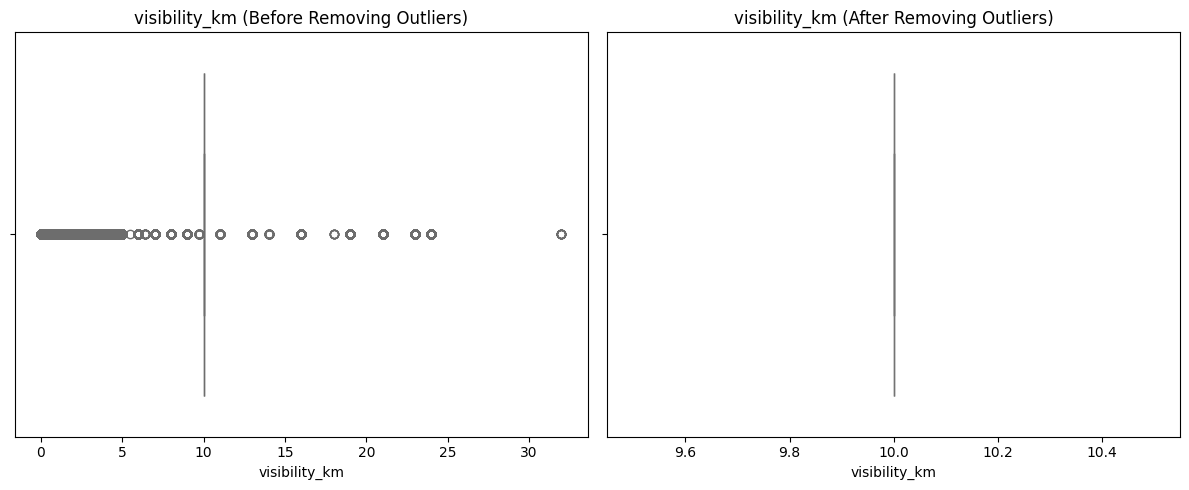

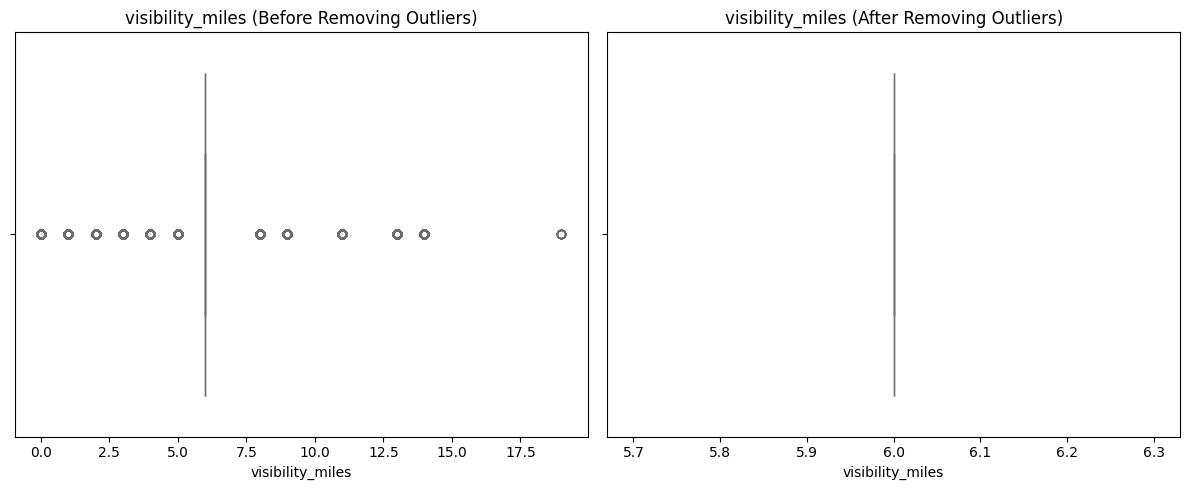

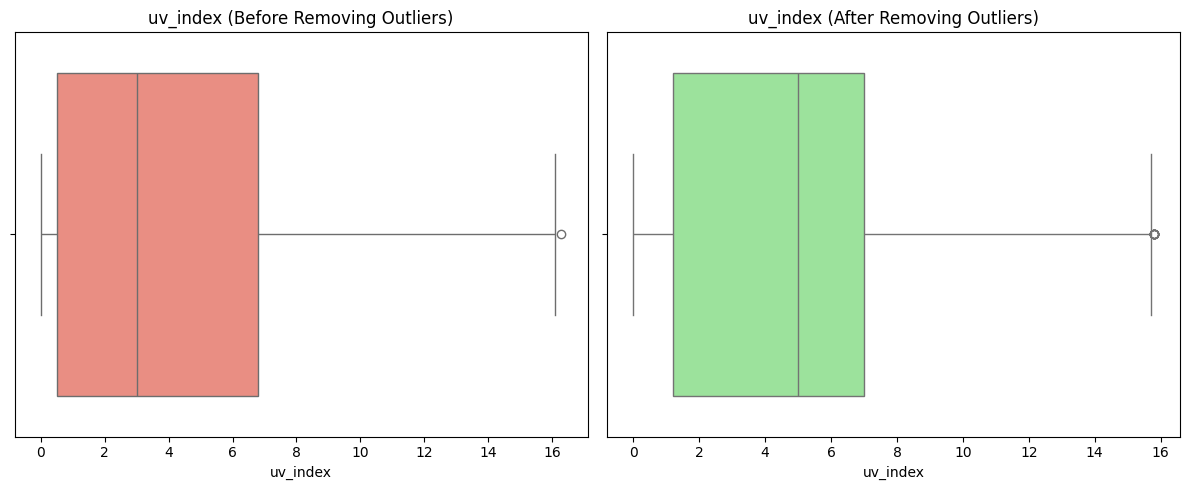

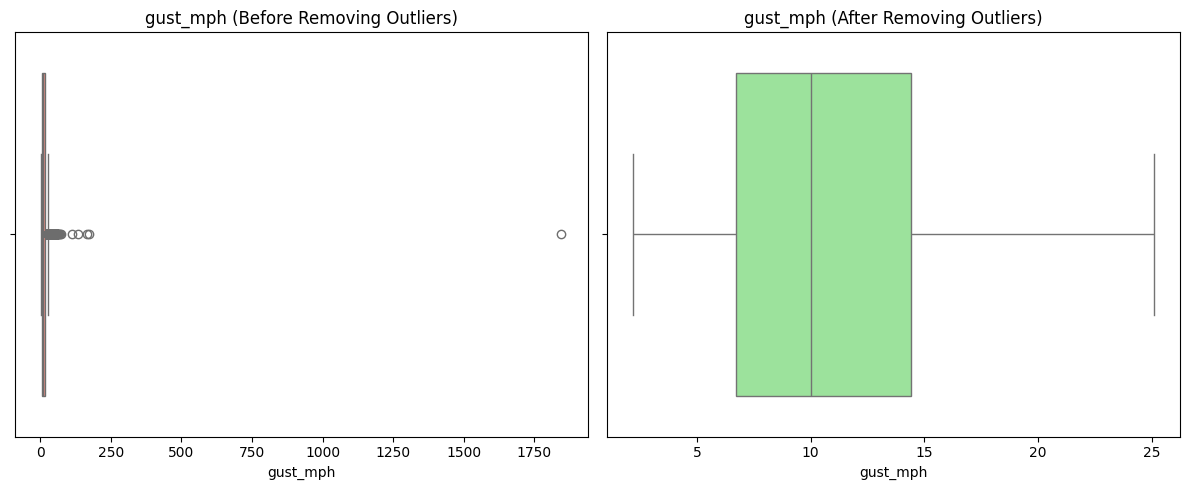

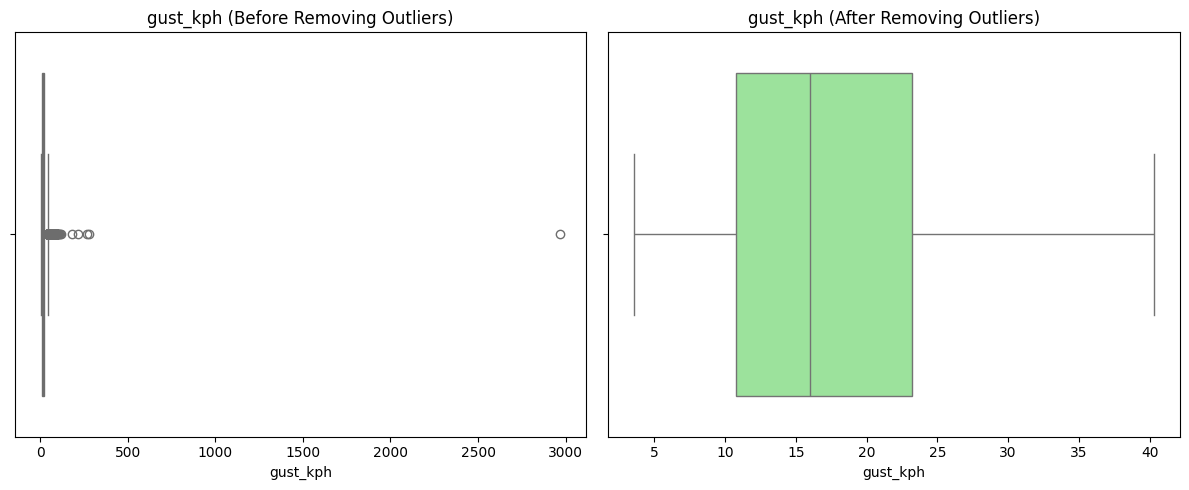

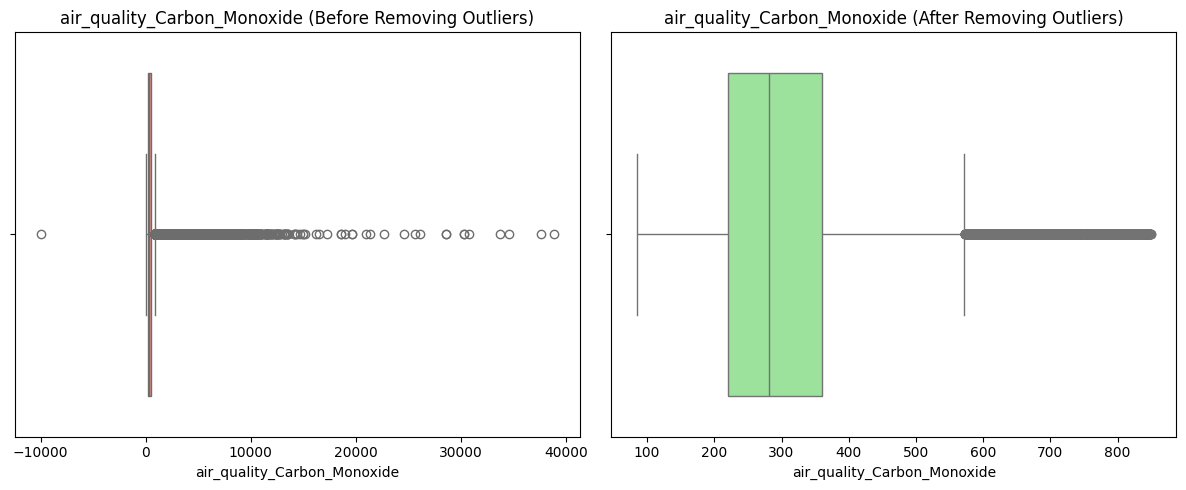

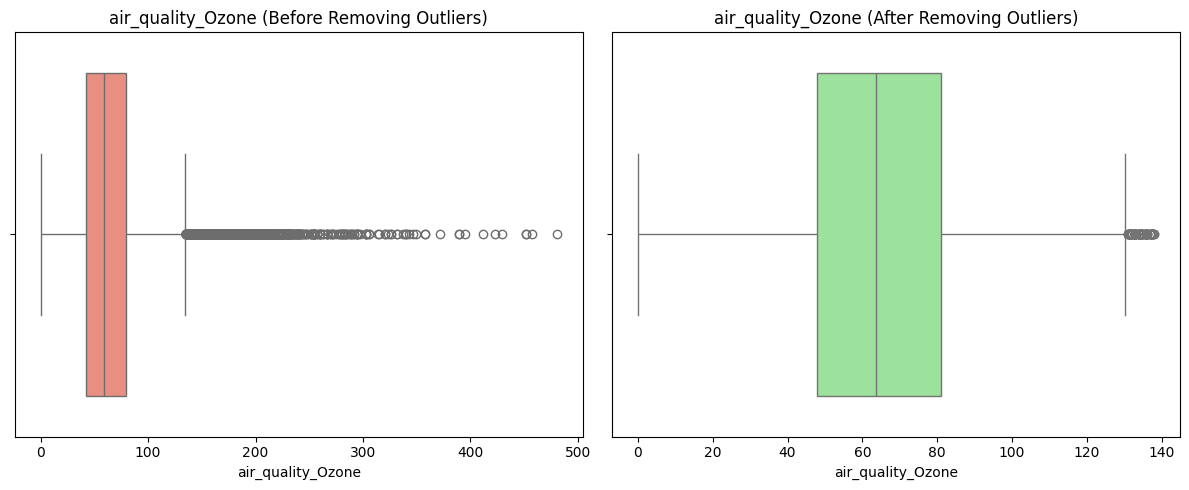

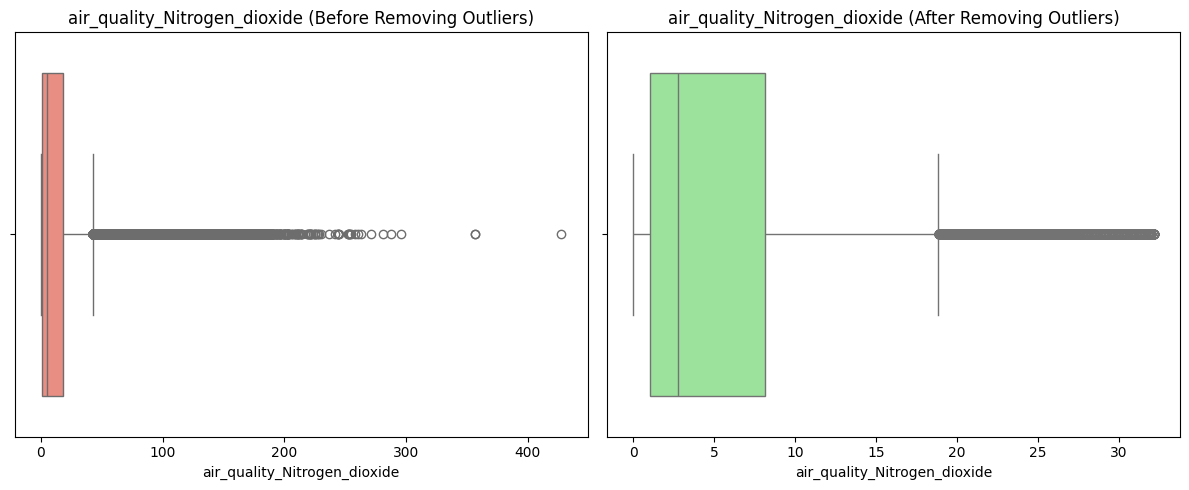

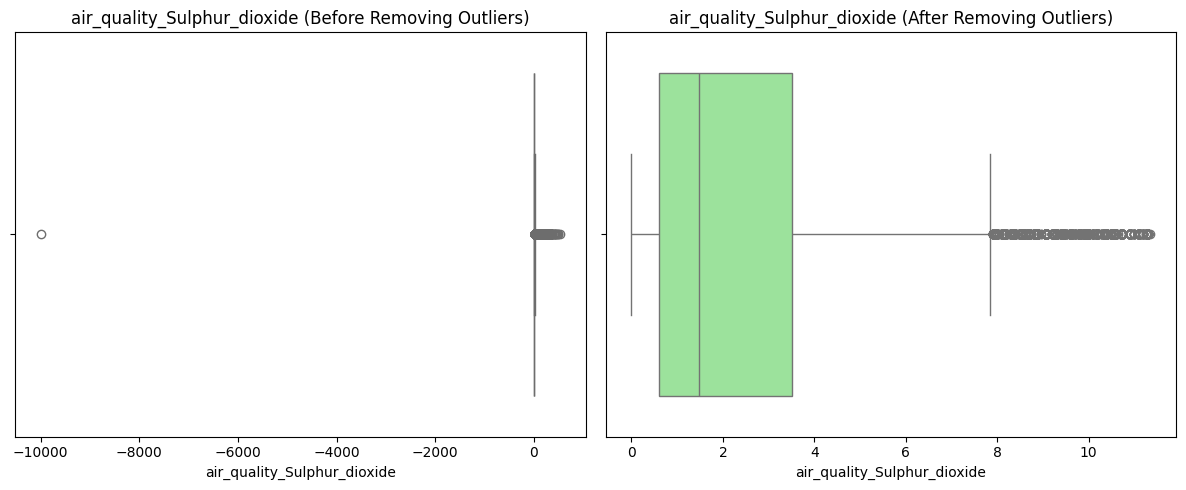

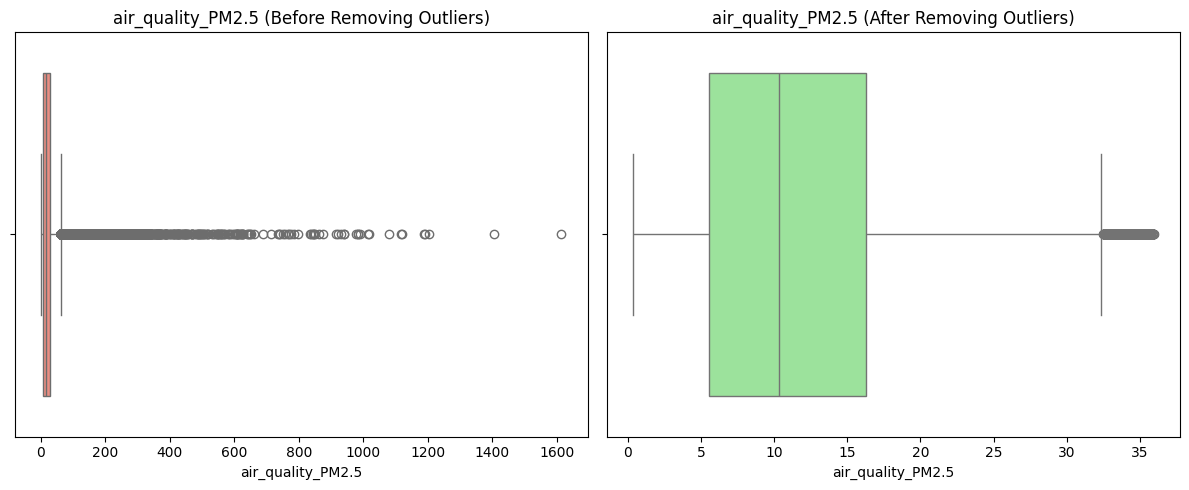

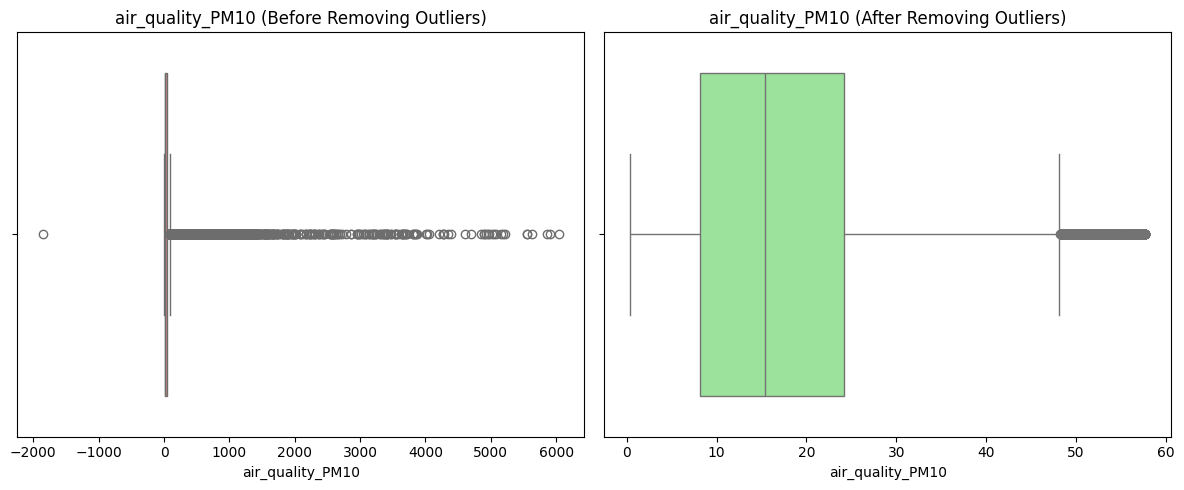

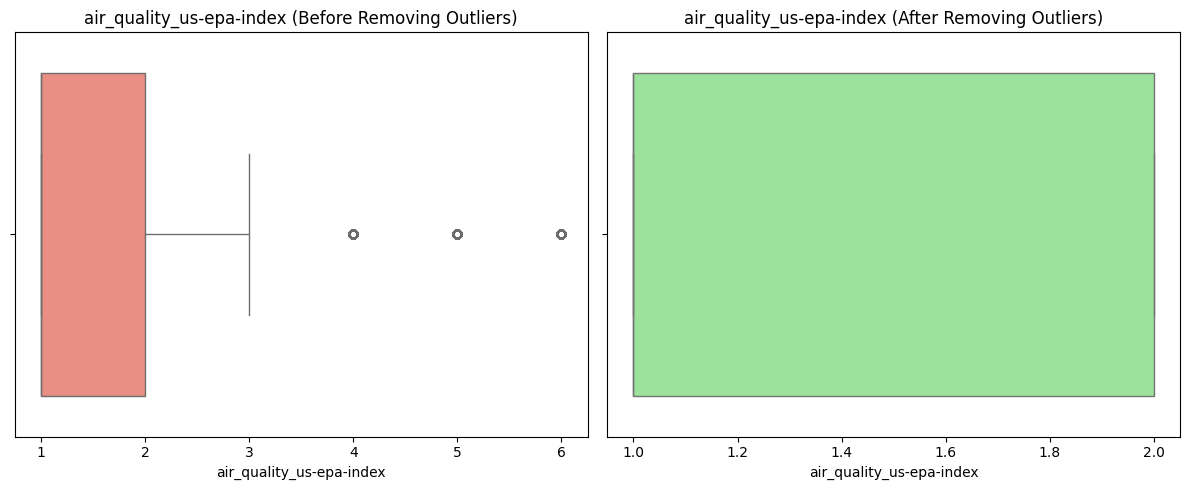

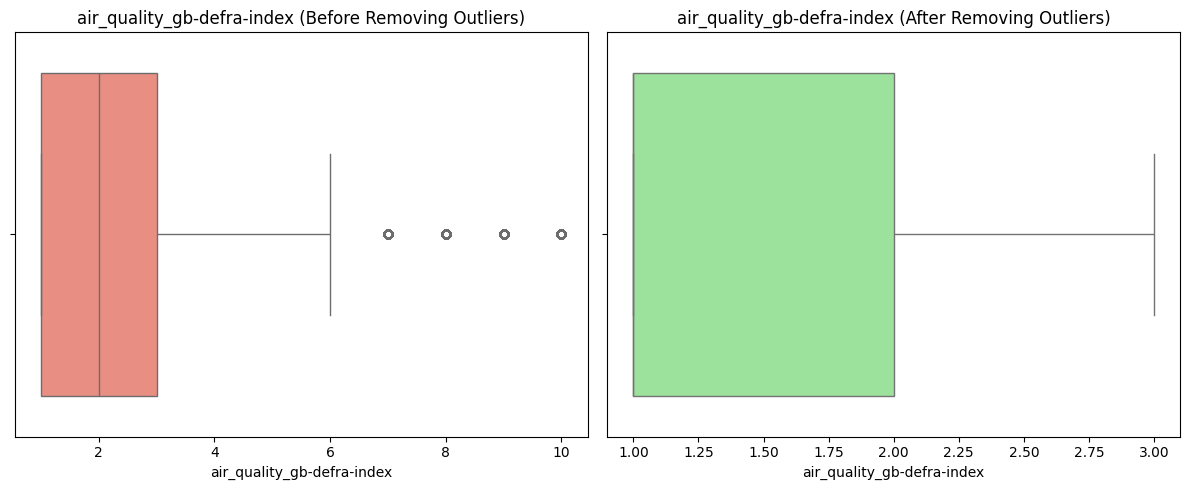

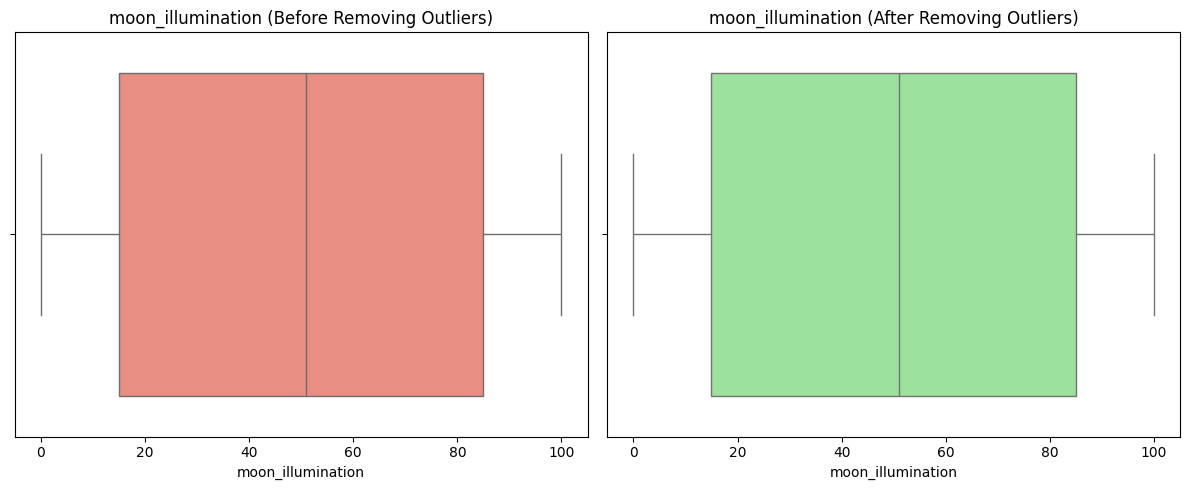

In [25]:
# Copy original dataset
df_weather_cleaned = df_weather.copy()

# Detect and remove outliers for each selected column
for col in numerical_cols:
    if col in df_weather_cleaned.columns:
        Q1 = df_weather_cleaned[col].quantile(0.25)
        Q3 = df_weather_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df_weather_cleaned[(df_weather_cleaned[col] < lower_bound) | (df_weather_cleaned[col] > upper_bound)]
        print(f"\n--- Outliers in '{col}' ---")
        if outliers.empty:
            print("No outliers detected.")
        else:
            print(outliers[[col]].head(10))

        # Remove outliers
        df_weather_cleaned = df_weather_cleaned[
            (df_weather_cleaned[col] >= lower_bound) & (df_weather_cleaned[col] <= upper_bound)
        ]

# Visualize before and after cleaning for each column
for col in numerical_cols:
    if col in df_weather.columns:
        plt.figure(figsize=(12, 5))

        # Before cleaning
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_weather[col], color='salmon')
        plt.title(f'{col} (Before Removing Outliers)')

        # After cleaning
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_weather_cleaned[col], color='lightgreen')
        plt.title(f'{col} (After Removing Outliers)')

        plt.tight_layout()
        plt.show()

##  Normalizition of Numerical Columns

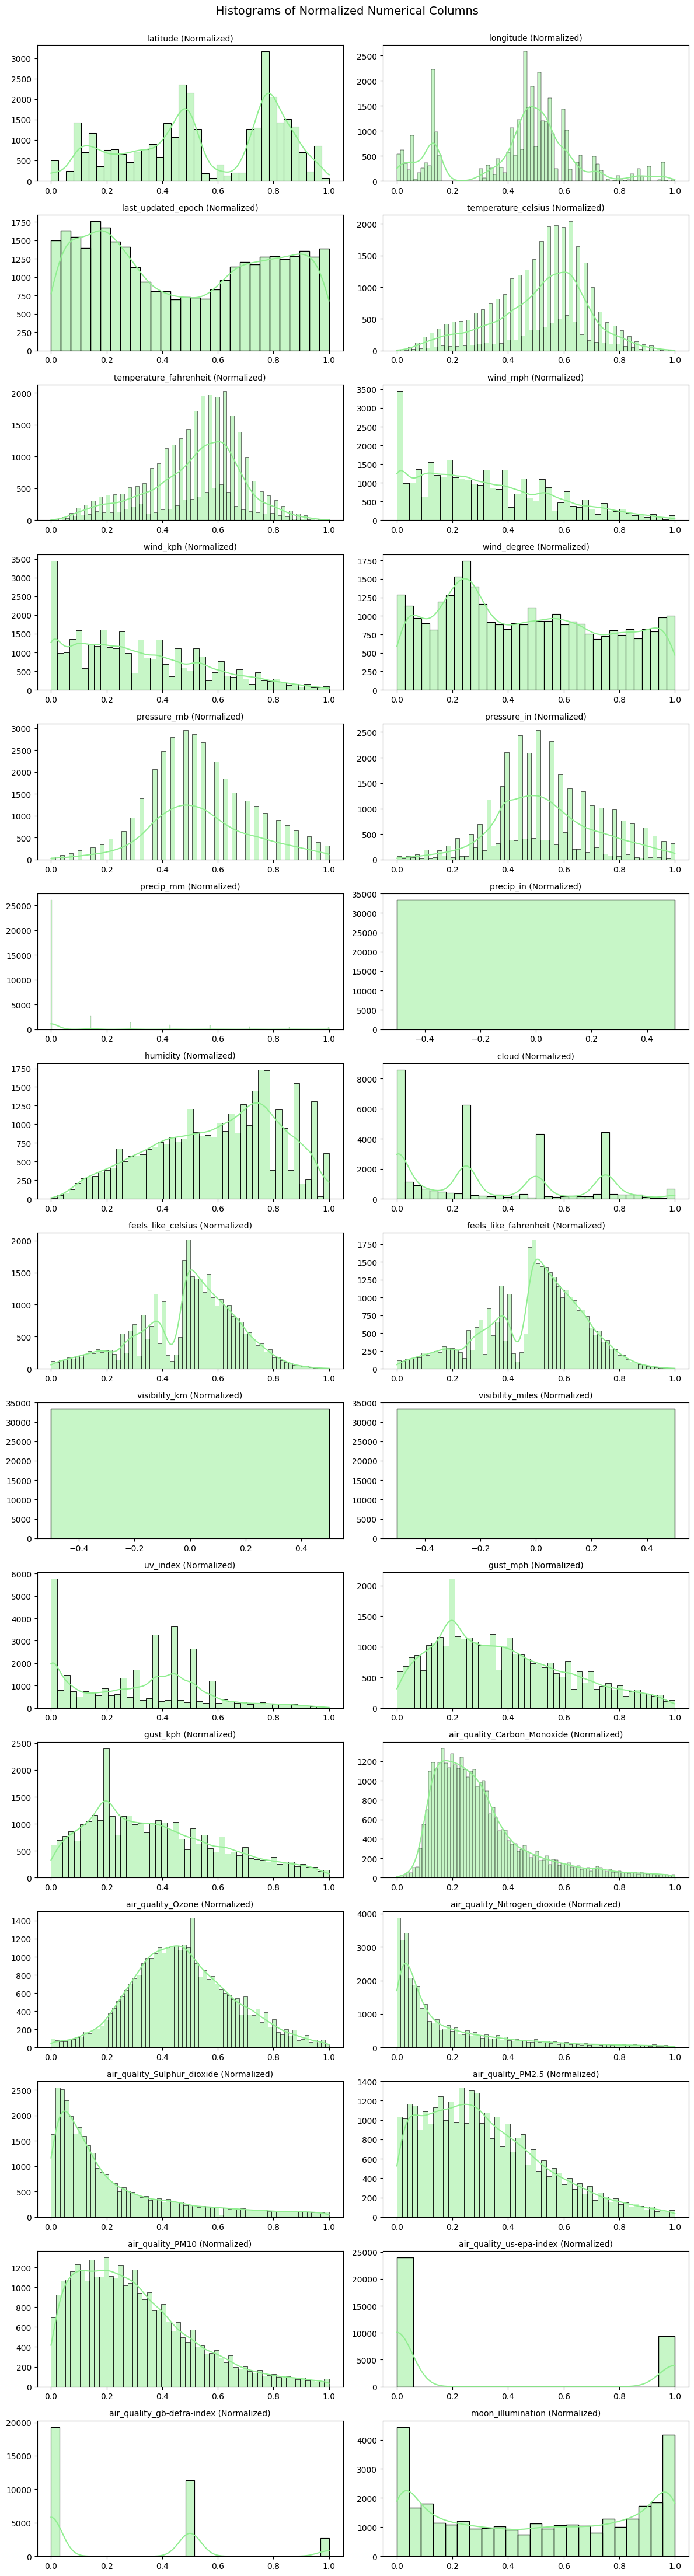

In [26]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# Normalize numerical columns using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
import math

scaler = MinMaxScaler()
df_weather_normalized = df_weather_cleaned.copy()
df_weather_normalized[numerical_cols] = scaler.fit_transform(df_weather_cleaned[numerical_cols])

cols_per_row = 2
total_cols = len(numerical_cols)
total_rows = math.ceil(total_cols / cols_per_row)

plt.figure(figsize=(12, total_rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(total_rows, cols_per_row, i)
    sns.histplot(df_weather_normalized[col], kde=True, color='lightgreen')
    plt.title(f"{col} (Normalized)", fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Histograms of Normalized Numerical Columns", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## Normalization of Categorical Columns 

In [27]:
# Normalize categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in categorical_cols:
    if col in df_weather_normalized.columns:
        df_weather_normalized[col] = encoder.fit_transform(df_weather_normalized[col])

print("Categorical columns encoded successfully!")
df_weather_normalized.head()


Categorical columns encoded successfully!


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,0,88,0.700737,0.709545,98,0.0,2024-05-16 13:15:00,0.583113,0.581498,12,...,0.225555,0.457367,0.0,0.0,100,174,1345,22,7,0.55
5,5,168,0.524997,0.127417,44,0.0,2024-05-16 04:45:00,0.567282,0.566814,13,...,0.023314,0.072014,0.0,0.0,146,156,11,28,7,0.55
6,6,52,0.002727,0.141545,45,0.0,2024-05-16 05:45:00,0.092348,0.091043,0,...,0.101963,0.085963,0.0,0.0,273,123,193,8,7,0.55
9,8,198,0.838905,0.474926,157,0.0,2024-05-16 10:45:00,0.303430,0.302496,13,...,0.093537,0.070270,0.0,0.0,124,273,1,204,7,0.55
10,9,26,0.760125,0.623801,84,0.0,2024-05-16 12:45:00,0.329815,0.328928,13,...,0.042976,0.031909,0.0,0.0,133,235,1429,140,7,0.55


In [28]:
# Save cleaned and normalized dataset
df_weather_normalized.to_csv('../data/cleaned_normalized_weather.csv', index=False)
print("Cleaned and normalized dataset saved successfully!")
print("File location: /kaggle/working/cleaned_normalized_weather.csv")


Cleaned and normalized dataset saved successfully!
File location: /kaggle/working/cleaned_normalized_weather.csv


## Thanks!